In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [47]:
# define the image size and batch size
img_size = (90, 140) # Width, Height
batch_size = 32

In [48]:
# define the path to your dataset folder
data_dir = "D:/AJAYMON/AJAY/Programming/S6_Mini_Project/dataset/numbers"

In [57]:
# use image_dataset_from_directory to load the data and split it into training and testing sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 21555 files belonging to 10 classes.
Using 17244 files for training.
Found 21555 files belonging to 10 classes.
Using 4311 files for validation.


In [58]:
# inspect the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print('Class names:', class_names)
print('Number of classes:', num_classes)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of classes: 10


In [55]:
# # convert the images to black and white
# def grayscale(image, label):
#     image = tf.image.rgb_to_grayscale(image)
#     return image, label

# train_ds = train_ds.map(grayscale)
# val_ds = val_ds.map(grayscale)

In [20]:
for images, labels in train_ds.take(1):
    print(images)

tf.Tensor(
[[[[253.      253.      253.     ]
   [252.53572 252.53572 252.53572]
   [251.92262 251.92262 251.92262]
   ...
   [251.9107  251.9107  251.9107 ]
   [243.63693 243.63693 243.63693]
   [236.38889 236.38889 236.38889]]

  [[253.83333 253.83333 253.83333]
   [253.75595 253.75595 253.75595]
   [253.57738 253.57738 253.57738]
   ...
   [246.29167 246.29167 246.29167]
   [242.86311 242.86311 242.86311]
   [240.      240.      240.     ]]

  [[254.      254.      254.     ]
   [254.      254.      254.     ]
   [254.04167 254.04167 254.04167]
   ...
   [243.74211 243.74211 243.74211]
   [242.28374 242.28374 242.28374]
   [242.      242.      242.     ]]

  ...

  [[254.61111 254.61111 254.61111]
   [254.3274  254.3274  254.3274 ]
   [254.04167 254.04167 254.04167]
   ...
   [243.80556 243.80556 243.80556]
   [245.95435 245.95435 245.95435]
   [248.61111 248.61111 248.61111]]

  [[255.      255.      255.     ]
   [254.53572 254.53572 254.53572]
   [254.      254.      254.     ]
 

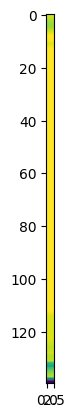

In [25]:
im = images[0][0].numpy()

plt.imshow(im)

In [56]:
val_ds.class_names

AttributeError: '_MapDataset' object has no attribute 'class_names'

## Training Neural Network

In [28]:
# define the input shape of the images
inp_shape = (90, 140, 1)  # 1 for grayscale images

In [29]:
# define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=inp_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # 10 classes (0-9)
])

In [30]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
# load your data and preprocess it
# assuming your data is stored in X_train, y_train, X_test, y_test
X_train = X_train.reshape(-1, 40, 40, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 40, 40, 1).astype('float32') / 255.0

NameError: name 'X_train' is not defined

In [36]:
# train the model
# model.fit(train_ds, train_ds.class_names, epochs=10, validation_data=(val_ds, val_ds.class_names))

model.fit(train_ds, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_2" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 90, 140, 3)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 90, 140, 3), dtype=float32)
      • training=True
      • mask=None


In [ ]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)